# ID5059 GROUP 19 PROJECT NOTEBOOK

# Load the Data

In [1]:
# Loading the Data and Exploratory Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imputation Evaluation
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Tackling Unbalanced Data
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler

# Data Cleaning
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy

# Testing
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Others
import warnings
warnings.filterwarnings("ignore")

C:\Users\Josh\AppData\Local\Temp\ipykernel_34868\2812136051.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Make the notebook output stable across runs.
random_state = 6969

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)

display(train_df.head(5))

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [3]:
#Info data sets
print(train_df.info(5))
print(test_df.info(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

# Exploratory Analysis

### Distributions

In [4]:
# Group columns by type and convert the integers (conversion not needed for categories)
cat_group = ['Drug','Sex', 'Ascites', 'Hepatomegaly', 'Spiders','Edema', 'Status']
int_group = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets','Stage']

train_df[int_group] = train_df[int_group].astype('int64')

# Filter columns directly from "train" into lists 
non_numeric_columns = train_df.select_dtypes(include='object').columns
numeric_columns = train_df.select_dtypes(include='number').columns


In [5]:
non_numeric_columns

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')

In [6]:
status_vals = train_df['Status'].value_counts()
print(status_vals)

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64


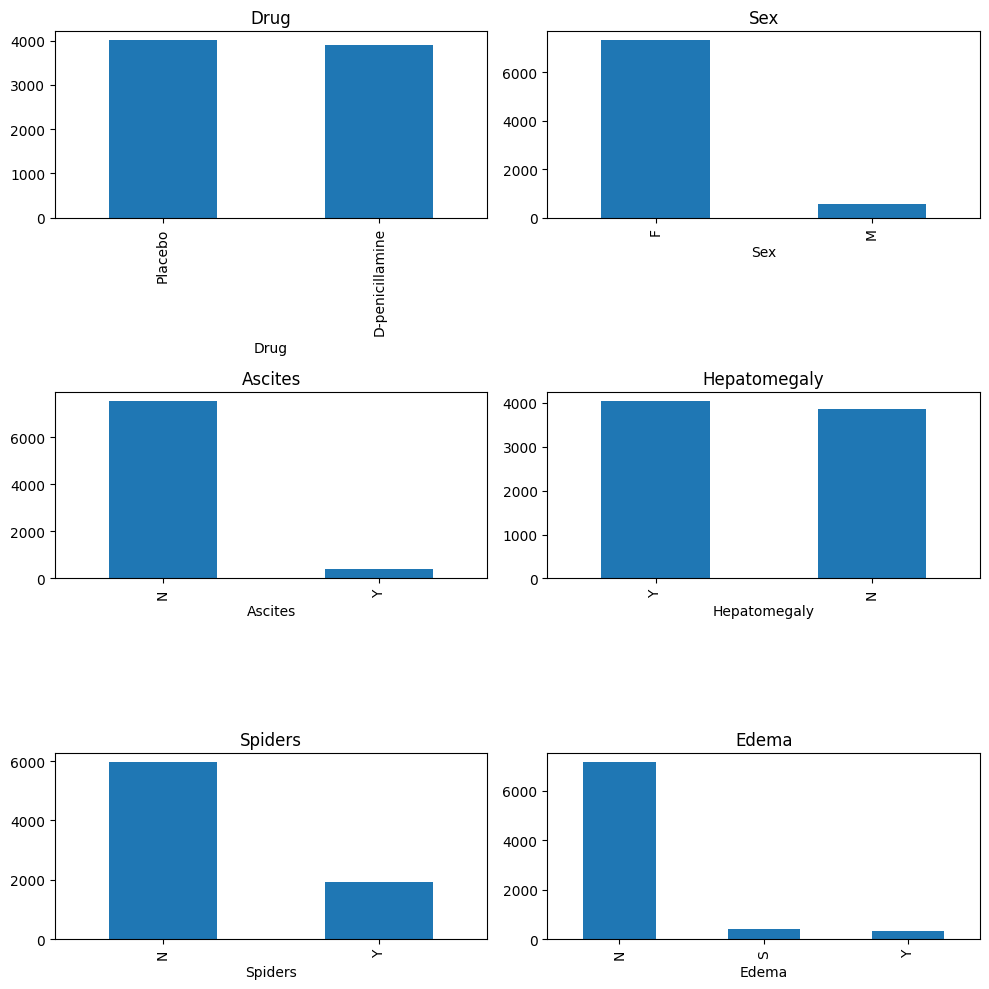

In [7]:
# Create a grid of plots
fig, axes = plt.subplots(nrows=len(non_numeric_columns) // 2 , ncols=2, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten(order='C')

# Iterate over non-numeric columns and plot histograms
for i, column in enumerate(non_numeric_columns.drop('Status')):   
    v_counts = train_df[column].value_counts()
    v_counts.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'N_Days'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Bilirubin'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Copper'}>],
       [<Axes: title={'center': 'Alk_Phos'}>,
        <Axes: title={'center': 'SGOT'}>,
        <Axes: title={'center': 'Tryglicerides'}>],
       [<Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Prothrombin'}>,
        <Axes: title={'center': 'Stage'}>]], dtype=object)

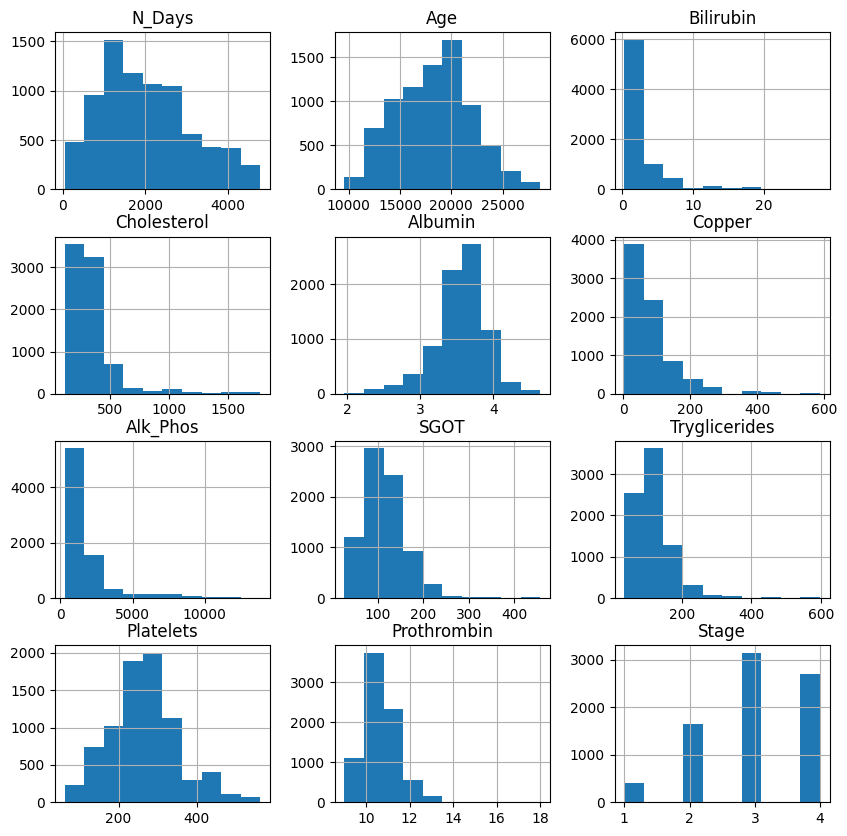

In [8]:
train_df.drop('id', axis=1).hist(figsize=(10, 10))

### Correlations

<Axes: title={'center': 'Correlation Matrix Numerical values'}>

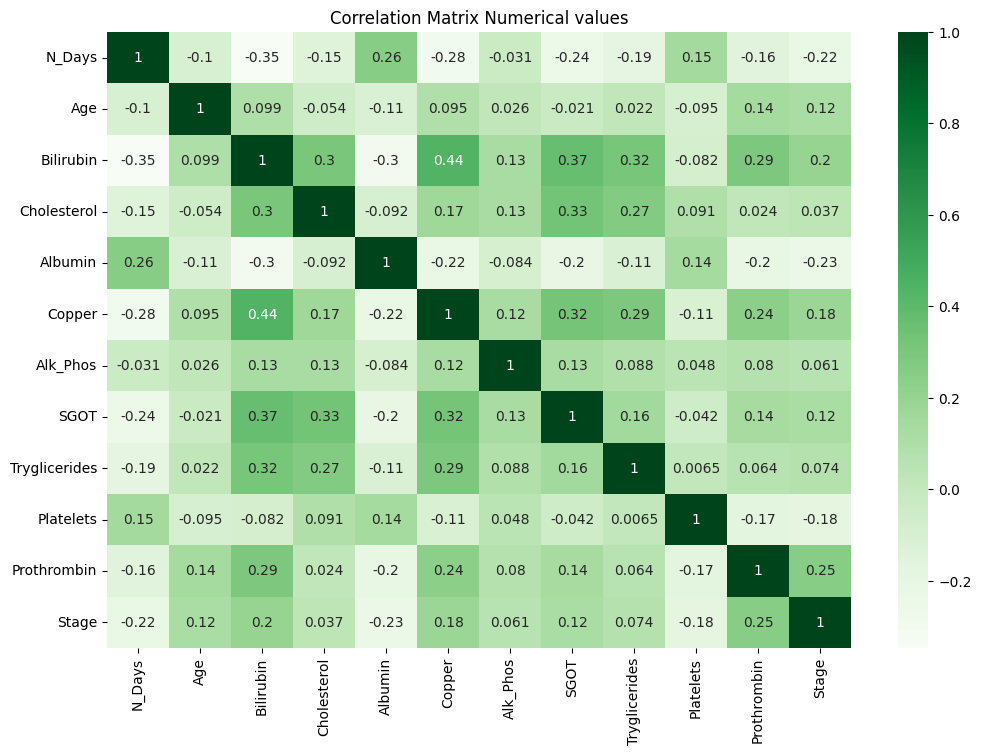

In [9]:
#Correlation matrix numerical values
matrix = train_df.drop('id', axis=1).select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize = (12, 8))
plt.title("Correlation Matrix Numerical values")
sns.heatmap(matrix, cmap = "Greens", annot = True)


<Axes: title={'center': 'Correlation Matrix for Categorical Variables'}>

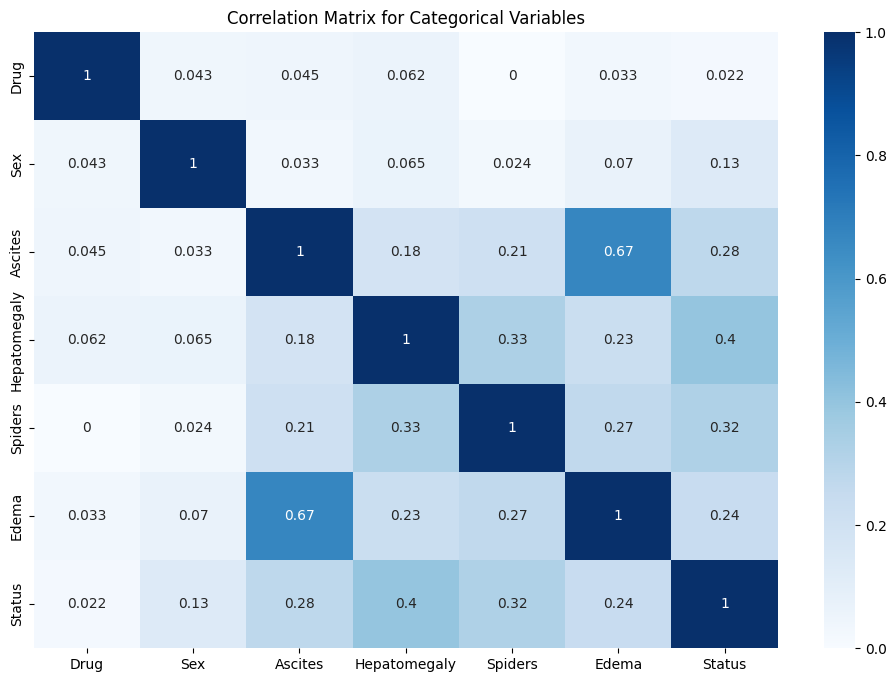

In [10]:
#Correlation Matrix categorical values
categorical_variables = train_df.select_dtypes(include=['object', 'category'])

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_cat_matrix = pd.DataFrame(np.zeros((len(categorical_variables), len(categorical_variables))), index=categorical_variables, columns=categorical_variables)

for col1 in categorical_variables:
    for col2 in categorical_variables:
        cramers_cat_matrix.loc[col1, col2] = cramers_v(train_df[col1], train_df[col2])

cramers_v_matrix = cramers_cat_matrix[categorical_variables.columns].iloc[(len(cramers_cat_matrix) - len(categorical_variables.columns)):]
        
plt.figure(figsize=(12, 8))
plt.title("Correlation Matrix for Categorical Variables")
sns.heatmap(cramers_v_matrix, annot=True, cmap='Blues', cbar=True)

# Imputation

In [11]:
# Check if there are any missing values
train_df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [12]:
# Randomly remove values in the dataframe

# Set it to 10% of the size of our datase
nan_size = round(0.10 * train_df.shape[0])

# Make a copy for safekeeping
df_nan = train_df.copy(deep=True)

for col in df_nan.columns:
    df_nan.loc[train_df[col].sample(n=nan_size, random_state=random_state).index, col] = np.NaN

In [13]:
# We can check how many rows have nans
df_nan.isnull().sum()

id               790
N_Days           790
Drug             790
Age              790
Sex              790
Ascites          790
Hepatomegaly     790
Spiders          790
Edema            790
Bilirubin        790
Cholesterol      790
Albumin          790
Copper           790
Alk_Phos         790
SGOT             790
Tryglicerides    790
Platelets        790
Prothrombin      790
Stage            790
Status           790
dtype: int64

### Method 1: Impute with Median

In [14]:
# This method will impute all numeric cells with the median of that column. 
# Categorical data will NOT be included. 

# Fill the nan cells with the median
df_filled_median = df_nan.fillna(df_nan.median(numeric_only=True))

In [15]:
# We check if there are still columns with nans.
# Notice that the categorical columns still have their nan values.
df_filled_median.isnull().sum()

id                 0
N_Days             0
Drug             790
Age                0
Sex              790
Ascites          790
Hepatomegaly     790
Spiders          790
Edema            790
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              0
Status           790
dtype: int64

In [16]:
# To evaluate this method, we try a t-test.
# We compare one column from the original (untouched) dataset with the the median-filled dataset.
# Here the result shows that the mean values are very different (p-value is large).

ttest_ind(train_df['N_Days'], df_filled_median['N_Days'])

TtestResult(statistic=1.58560276488659, pvalue=0.11284945070048405, df=15808.0)

### Method 2: Impute with Mode

In [17]:
# This method will impute all numeric cells with the most column values of that column. 
# This time, categorical data will also be included. 

df_filled_mode = df_nan.fillna(df_nan.mode(axis=0, numeric_only=False).iloc[0])

In [18]:
# We check if ther are still nan values.
# Here we notice all columns (including categoricals) have been filled in.

df_filled_mode.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [19]:
# We again compare one column from the original (untouched) dataset with the the mode-filled dataset.
# The results also show very different means.

ttest_ind(train_df['N_Days'], df_filled_mode['N_Days'])

TtestResult(statistic=5.149895729122442, pvalue=2.6376124920928824e-07, df=15808.0)

### Method 3: Impute with Mean


In [20]:
# Fill the nan cells with the mean
df_filled_mean = df_nan.fillna(df_nan.mean(numeric_only=True))
df_filled_mean.head(5)


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0.0,999.0,D-penicillamine,21532.0,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1.0,2574.0,Placebo,19237.0,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2.0,3428.0,Placebo,13727.0,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3.0,2576.0,Placebo,18460.0,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4.0,788.0,Placebo,16658.0,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [21]:
# We check if there are still nan values.
# Like the median, this mean imputation can only handle numeric values.
df_filled_mean.isnull().sum()

id                 0
N_Days             0
Drug             790
Age                0
Sex              790
Ascites          790
Hepatomegaly     790
Spiders          790
Edema            790
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              0
Status           790
dtype: int64

In [22]:
# Again comparing with the ttest for the median
ttest_ind(train_df['N_Days'], df_filled_mean['N_Days'])

TtestResult(statistic=0.45709882644733757, pvalue=0.6476062949695143, df=15808.0)

# Tackling unbalanced data


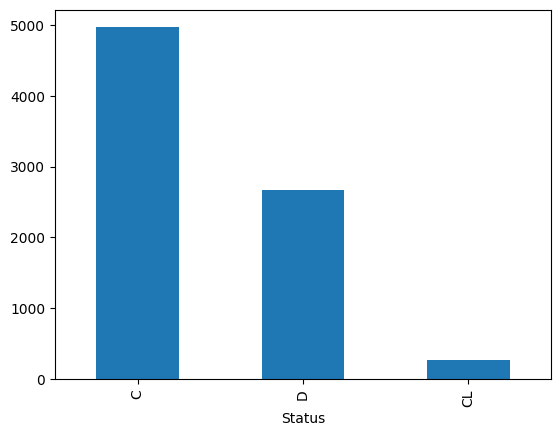

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64


In [23]:
# from the plot, we can see: "C" >> "D" >> CL"
y_train_counts = train_df['Status'].value_counts()
y_train_counts.plot(kind='bar', stacked=True)
plt.show()
print(y_train_counts)

### Method 1: Oversampling

original sample size:  7905
after SMOTE sample size: 14895


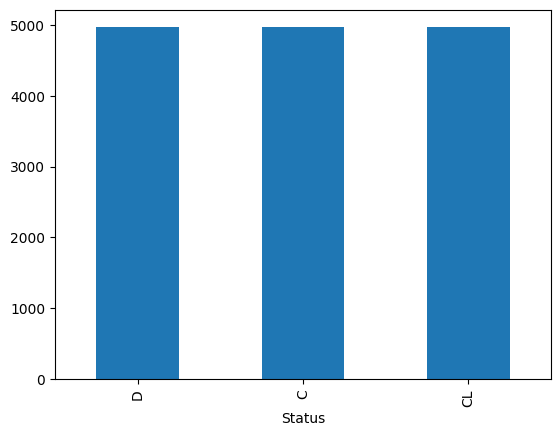

Status
D     4965
C     4965
CL    4965
Name: count, dtype: int64


In [24]:
# X_train: train dataset X; cat_group: array of categorical features

X_train = train_df.drop('Status', axis=1)
y_train = train_df['Status']

def handle_ont_hot_encoding(X_train, cat_group): 
   
    X_train_categorial = X_train.loc[:, cat_group]
    X_train_other = X_train.drop(columns=cat_group)

    # drop id
    X_train_other = X_train_other.drop(columns=["id"])

    one_hot_encoder = OneHotEncoder()
    X_train_cat_encoded = one_hot_encoder.fit_transform(X_train_categorial)
    X_train_cat = X_train_cat_encoded.toarray()
    X_train_cat = pd.DataFrame(
        X_train_cat,
        columns=one_hot_encoder.get_feature_names_out(),
        index=X_train_categorial.index)
    # Concatenate X_train with the encoded categorical features
    X_train_encoded = pd.concat([X_train_other, X_train_cat], axis=1)
    return X_train_encoded


# X_train_encoded: train data after one-hot encoding; y_train: train data y
def handle_with_oversampling(X_train_encoded, y_train):
    # use SMOTE to generate sample data
    smote = SMOTE(random_state=random_state)
    X_oversampled, y_oversampled = smote.fit_resample(X_train_encoded, y_train)
    return X_oversampled, y_oversampled


 # the category features in the X_train
cat_group = ['Drug','Sex', 'Ascites', 'Hepatomegaly', 'Spiders','Edema']
X_train_encoded = handle_ont_hot_encoding(X_train, cat_group)
X_oversampled, y_oversampled = handle_with_oversampling(X_train_encoded, y_train)

# print original size, after SMOTE size
print("original sample size: ", len(X_train_encoded))
print("after SMOTE sample size:", len(X_oversampled))

# draw plot: we can see the balanced data plot after using SMOTE.
y_oversampled_counts = y_oversampled.value_counts()
y_oversampled_counts.plot(kind='bar', stacked=True)
plt.show()
print(y_oversampled_counts)

### Method 2: Undersampling

825
825


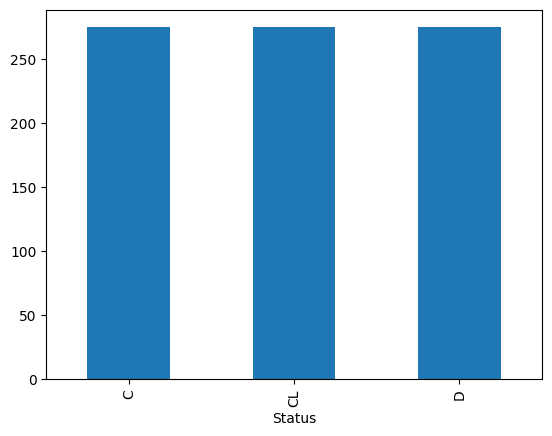

Status
C     275
CL    275
D     275
Name: count, dtype: int64


In [25]:
def handle_with_undersampling(X_train, y_train):
    rus = RandomUnderSampler(random_state=random_state)

    # using undersampling for train dataset
    X_ondersampled, y_underresampled = rus.fit_resample(X_train, y_train)
    return X_ondersampled, y_underresampled

X_ondersampled, y_underresampled = handle_with_undersampling(X_train, y_train)

print(len(X_ondersampled))
print(len(y_underresampled))
# we can see the balanced data plot after using SMOTE.
y_underresampled_counts = y_underresampled.value_counts()
y_underresampled_counts.plot(kind='bar', stacked=True)
plt.show()
print(y_underresampled_counts)

# Data Cleaning


In [26]:
# Transform binary columns into '1' or '0',
# one hot encoding of categorical column,
# and scale numerical columns

# Putting it all together into one pipeline

df_cleaning = pd.read_csv("train.csv")
df_cleaning.drop(['id','Status'], axis=1, inplace=True)

numerical_columns = [
                    'N_Days',
                    'Age',
                     'Bilirubin',
                     'Cholesterol',
                     'Albumin',
                     'Copper',
                     'Alk_Phos',
                     'SGOT',
                     'Tryglicerides',
                     'Platelets',
                     'Prothrombin'
                     ]

binary_columns =    ['Sex',
                     'Ascites',
                     'Hepatomegaly',
                     'Spiders',
                     'Edema']

categorical_columns = ['Drug']

pipeline = ColumnTransformer([
    ("numerical", StandardScaler(), numerical_columns),
    ("binary", OrdinalEncoder(), binary_columns),
    ("categorical", OneHotEncoder(), categorical_columns)],
    
    remainder='passthrough') # The 'remainder' is the Stage column

df_prepared = pipeline.fit_transform(df_cleaning)

In [27]:
pd.DataFrame(df_prepared).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.942430,0.858448,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
1,0.497025,0.234760,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,1.277529,-1.262634,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,0.0,0.0,1.0,1.0,2.0,0.0,1.0,4.0
3,0.498852,0.023603,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
4,-1.135271,-0.466107,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0


# Model Building and Testing

### Model 1: Random Forest Classifier with Undersampled Data

In [28]:
# Create validation set
X_train_undersampled_80, X_validation_undersampled_20, y_train_undersampled_80, y_validation_undersampled_20 = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=random_state)

# Prepare Undersampled data
rus = RandomUnderSampler(random_state=random_state)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_undersampled_80, y_train_undersampled_80)
X_validation_undersampled, y_validation_undersampled = rus.fit_resample(X_validation_undersampled_20, y_validation_undersampled_20)

# Pass through the pipeline
X_train_undersampled_prepared = pipeline.fit_transform(X_train_undersampled)
X_validation_undersampled_prepared = pipeline.transform(X_validation_undersampled)

# # Build first model
randomForest0 = RandomForestClassifier(random_state=random_state)
randomForest0.fit(X_train_undersampled_prepared, y_train_undersampled)

RandomForestClassifier(random_state=6969)

In [29]:
# Get predictions and metrics
random_forest0_predictions=randomForest0.predict(X_validation_undersampled_prepared)
random_forest0_predictions_train=randomForest0.predict(X_train_undersampled_prepared)

# Precision
train_pr = round(precision_score(y_train_undersampled, random_forest0_predictions_train,average="weighted"), 5)
valid_pr = round(precision_score(y_validation_undersampled, random_forest0_predictions,average="weighted"), 5)
print("Precision, train:", train_pr, "validation:", valid_pr)

# Recall
train_recall = round(recall_score(y_train_undersampled, random_forest0_predictions_train, average="weighted"), 5)
valid_recall = round(recall_score(y_validation_undersampled, random_forest0_predictions,average="weighted"), 5)
print("Recall, train:", train_recall, "validation:", valid_recall)

# F1 score
f1_train = round(f1_score(y_train_undersampled,random_forest0_predictions_train,average="weighted"), 5)
f1_valid = round(f1_score(y_validation_undersampled, random_forest0_predictions,average="weighted"), 5)
print("F1 score, train:", f1_train, "validation:", f1_valid)

# Log loss
random_forest0_predict_proba = randomForest0.predict_proba(X_validation_undersampled_prepared)
print('\nThe log loss for this model is ', round(log_loss(y_validation_undersampled, random_forest0_predict_proba), 5))

Precision, train: 1.0 validation: 0.67525
Recall, train: 1.0 validation: 0.67308
F1 score, train: 1.0 validation: 0.67332

The log loss for this model is  0.81599


### Model 2: Random Forest with Oversampled Data and choosing values for Parameters

In [30]:
# Note: The grid search code below takes approximately 15 minutes to run.

In [31]:
params = {'max_leaf_nodes': list(range(50, 910,100)), 
          'min_samples_split': [2,4,8],
         "n_estimators": list(range(10,205,20))}

from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=42)

grid_search_cv = GridSearchCV(
  randomForest, 
  params, verbose=1, cv=3)

grid_search_cv.fit(X_oversampled, y_oversampled)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [50, 150, 250, 350, 450, 550, 650,
                                            750, 850],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150,
                                          170, 190]},
             verbose=1)

In [32]:
grid_search_cv.best_estimator_

RandomForestClassifier(max_leaf_nodes=850, min_samples_split=8,
                       n_estimators=170, random_state=42)

In [33]:
# Splitting using the oversampled data
X_train, X_validation,y_train,y_validation = train_test_split(
    X_oversampled,y_oversampled, 
    test_size=0.2, 
    random_state=random_state # set seed for reproducibility   
)

# Data Cleaning with oversampled data
numerical_columns = [
                    'N_Days',
                    'Age',
                     'Bilirubin',
                     'Cholesterol',
                     'Albumin',
                     'Copper',
                     'Alk_Phos',
                     'Platelets',
                     'Prothrombin'
                     ]

binary_columns =    ['Sex_M',
                     'Ascites_N',
                     'Spiders_N',
                     'Edema_Y']

categorical_columns = ['Drug_Placebo']

pipeline = ColumnTransformer([
    ("numerical", StandardScaler(), numerical_columns),
    ("binary", OrdinalEncoder(), binary_columns),
    ("categorical", OrdinalEncoder(), categorical_columns)],
    remainder='passthrough'
                            ) # The 'remainder' is the Stage column

X_train_prepared = pipeline.fit_transform(X_train)
X_validation_prepared = pipeline.fit_transform(X_validation)

forest_classifier=RandomForestClassifier(max_leaf_nodes=850, n_estimators=190,min_samples_split=8,max_depth=100, random_state=random_state)
forest_classifier.fit(X_train_prepared,y_train)

RandomForestClassifier(max_depth=100, max_leaf_nodes=850, min_samples_split=8,
                       n_estimators=190, random_state=6969)

In [34]:
# Get predictions and metrics
random_forest_predictions=forest_classifier.predict(X_validation_prepared)
random_forest_predictions_train=forest_classifier.predict(X_train_prepared)

# Precision
train_pr = round(precision_score(y_train, random_forest_predictions_train,average="weighted"), 5)
valid_pr = round(precision_score(y_validation, random_forest_predictions,average="weighted"), 5)
print("Precision, train:", train_pr, "validation:", valid_pr)

# Recall
train_recall = round(recall_score(y_train, random_forest_predictions_train, average="weighted"), 5)
valid_recall = round(recall_score(y_validation, random_forest_predictions,average="weighted"), 5)
print("Recall, train:", train_recall, "validation:", valid_recall)

# F1 score
f1_train = round(f1_score(y_train,random_forest_predictions_train,average="weighted"), 5)
f1_valid = round(f1_score(y_validation, random_forest_predictions,average="weighted"), 5)
print("F1 score, train:", f1_train, "validation:", f1_valid)

#Log loss
random_forest_predictions_prob=forest_classifier.predict_proba(X_validation_prepared)
print('\nThe log loss for this model is ', round(log_loss(y_validation, random_forest_predictions_prob), 5))

Precision, train: 0.97542 validation: 0.8646
Recall, train: 0.97516 validation: 0.86304
F1 score, train: 0.97515 validation: 0.86229

The log loss for this model is  0.48243


### Model 3: Random Forest Classifier with Original Data

In [35]:
train_labels_original= train_df['Status']
X_train_original, X_validation_original,y_train_original,y_validation_original = train_test_split(
    X_train_encoded,train_labels_original, 
    test_size=0.2, 
    random_state=random_state # set seed for reproducibility   
)

X_train_prepared_original = pipeline.fit_transform(X_train_original)
X_validation_prepared_original = pipeline.fit_transform(X_validation_original)

In [36]:
forest_classifier.fit(X_train_prepared_original,y_train_original)

RandomForestClassifier(max_depth=100, max_leaf_nodes=850, min_samples_split=8,
                       n_estimators=190, random_state=6969)

In [37]:
# Get predictions and metrics
random_forest_predictions=forest_classifier.predict(X_validation_prepared_original)
random_forest_predictions_train=forest_classifier.predict(X_train_prepared_original)

# Precision
train_pr = round(precision_score(y_train_original, random_forest_predictions_train,average="weighted"), 5)
valid_pr = round(precision_score(y_validation_original, random_forest_predictions,average="weighted"), 5)
print("Precision, train:", train_pr, "validation:", valid_pr)

# Recall
train_recall = round(recall_score(y_train_original, random_forest_predictions_train, average="weighted"), 5)
valid_recall = round(recall_score(y_validation_original, random_forest_predictions,average="weighted"), 5)
print("Recall, train:", train_recall, "validation:", valid_recall)

# F1 score
f1_train = round(f1_score(y_train_original,random_forest_predictions_train,average="weighted"), 5)
f1_valid = round(f1_score(y_validation_original, random_forest_predictions,average="weighted"), 5)
print("F1 score, train:", f1_train, "validation:", f1_valid)

#Log loss
random_forest_predictions_prob=forest_classifier.predict_proba(X_validation_prepared)
print('\nThe log loss for this model is ', round(log_loss(y_validation, random_forest_predictions_prob), 5))

Precision, train: 0.94881 validation: 0.78233
Recall, train: 0.94766 validation: 0.81088
F1 score, train: 0.94402 validation: 0.79439

The log loss for this model is  1.08488


### Model 4: Logistic Regression

In [38]:
# The code below was used to find the best parameters for the Logistic Regression
# It is in RAW format since it took 4 hours to run, but we know the results (C=10000,max_iter=1000,solver="newton-cg",penalty="l2")

In [39]:
from sklearn import linear_model 

logr = linear_model.LogisticRegression(C=10000,max_iter=1000,solver="newton-cg",penalty="l2")
logr.fit(X_train_prepared,y_train)

LogisticRegression(C=10000, max_iter=1000, solver='newton-cg')

In [40]:
# Get predictions and metrics
logr_predictions = logr.predict(X_validation_prepared)
logr_predictions_train = logr.predict(X_train_prepared)

# Precision
logr_train_pr = round(precision_score(y_train, logr_predictions_train,average="weighted"), 5)
logr_valid_pr = round(precision_score(y_validation, logr_predictions,average="weighted"), 5)
print("Precision, train:", logr_train_pr, "validation:", logr_valid_pr)

# Recall
logr_train_recall = round(recall_score(y_train, logr_predictions_train, average="weighted"), 5)
logr_valid_recall = round(recall_score(y_validation, logr_predictions,average="weighted"), 5)
print("Recall, train:", logr_train_recall, "validation:", logr_valid_recall)

# F1 score
logr_f1_train = round(f1_score(y_train,logr_predictions_train,average="weighted"), 5)
logr_f1_valid = round(f1_score(y_validation, logr_predictions,average="weighted"), 5)
print("F1 score, train:", logr_f1_train, "validation:", logr_f1_valid)

#Log loss
logr_predictions_prob = logr.predict_proba(X_validation_prepared)
print('\nThe log loss for this model is ', round(log_loss(y_validation, logr_predictions_prob), 5))

Precision, train: 0.70148 validation: 0.41062
Recall, train: 0.70049 validation: 0.3236
F1 score, train: 0.69915 validation: 0.26203

The log loss for this model is  20.27277


### Model 5: SGD Classifier

In [41]:
#Create SGD Classifier
svm_multi_classifier = SGDClassifier(random_state=random_state, loss='modified_huber') 
# Now using y_train not y_train_5.
svm_multi_classifier.fit(X_train_prepared, y_train)

SGDClassifier(loss='modified_huber', random_state=6969)

In [42]:
multi_predictions = svm_multi_classifier.predict(X_validation_prepared) 
multi_predictions_train=svm_multi_classifier.predict(X_train_prepared)

#precision
train_pr_mt = round(precision_score(y_train, multi_predictions_train,average="weighted"), 5)
valid_pr_mt = round(precision_score(y_validation, multi_predictions,average="weighted"), 5)
print("Precision, train:", train_pr_mt, ", validation:", valid_pr_mt)

#recall
train_recall_mt = round(recall_score(y_train, multi_predictions_train, average="weighted"), 5)
valid_recall_mt = round(recall_score(y_validation, multi_predictions,average="weighted"), 5)
print("Recall, train:", train_recall_mt, "validation:", valid_recall_mt)

#f1
f1_train_mt = round(f1_score(y_train,multi_predictions_train,average="weighted"), 5)
f1_valid_mt = round(f1_score(y_validation, multi_predictions,average="weighted"), 5)
print("F1 score, train:", f1_train_mt, "validation:", f1_valid_mt)

multi_predictions_proba = svm_multi_classifier.predict_proba(X_validation_prepared) 
print('\nThe log loss for this model is ', round(log_loss(y_validation, multi_predictions_proba), 5))


Precision, train: 0.59373 , validation: 0.58433
Recall, train: 0.52375 validation: 0.46324
F1 score, train: 0.50713 validation: 0.38364

The log loss for this model is  11.30985


# Kaggle Test

### Results for Model 2 (Random Forest with Oversampled Data)

In [43]:
# We compare our best model (Random Forest with Oversampled Data) with a baseline (Random Forest with Original Data)

In [44]:
# Process the test data through the pipeline
X_test_encoded = handle_ont_hot_encoding(test_df, cat_group)
X_test_prepared = pipeline.transform(X_test_encoded)

# Fit with the oversampled data
forest_classifier.fit(X_train_prepared, y_train)

# Get the predictions
random_forest_predictions_test=forest_classifier.predict_proba(X_test_prepared)
random_forest_predictions_test

array([[0.25454682, 0.13690035, 0.60855283],
       [0.26660983, 0.37735842, 0.35603175],
       [0.10455102, 0.10015721, 0.79529177],
       ...,
       [0.28904885, 0.30775181, 0.40319934],
       [0.58604393, 0.27366348, 0.14029259],
       [0.27571213, 0.12428499, 0.60000288]])

In [45]:
# features
columns = ['Status_C', 'Status_CL', 'Status_D']

# Save to CSV
upload_data = pd.DataFrame(random_forest_predictions_test, columns=columns)
ids_test = test_df['id']
upload_data = pd.concat([ids_test, upload_data], axis=1)
upload_data.to_csv('id5059-group19.csv', index=False)

print ("The public score for this model on Kaggle is 0.63115")

The public score for this model on Kaggle is 0.63115


### Results for Model 3 (Random Forest with Original Data)

In [46]:
# Fit with the original data
forest_classifier.fit(X_train_prepared_original, y_train_original)

# Get the predictions
random_forest_predictions_test2=forest_classifier.predict_proba(X_test_prepared)
random_forest_predictions_test2

array([[0.65062677, 0.0355091 , 0.31386413],
       [0.8108084 , 0.05468154, 0.13451006],
       [0.09679464, 0.07214386, 0.8310615 ],
       ...,
       [0.88315232, 0.02336922, 0.09347847],
       [0.99508772, 0.0022807 , 0.00263158],
       [0.48231602, 0.05092149, 0.46676249]])

In [47]:
# Save to CSV
upload_data2 = pd.DataFrame(random_forest_predictions_test2, columns=columns)
ids_test = test_df['id']
upload_data2 = pd.concat([ids_test, upload_data2], axis=1)
upload_data2.to_csv('id5059-group19-2.csv', index=False)

print ("The public score for this model on Kaggle is 0.45730")

The public score for this model on Kaggle is 0.45730
